# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
#### Tal Daniel
## Tutorial 06 - Optimization

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Optimization Problems
* 1-dimensional Optimization
    * Least-Squares
    * Gradient Descent
    * Stochastic Gradient Descent (SGD)
* Mathematical Background
    * Gradient
    * Multi-dimensional Calculus
    * Chain Rule
* Multi-dimensional Optimization
* Constrained Optimization
    * Largrange Multipliers
    * Examples: Entropy

## <img src="https://img.icons8.com/dusk/64/000000/ask-question.png" style="height:50px;display:inline"> Optimization Problems

### <img src="https://img.icons8.com/dusk/64/000000/define-location.png" style="height:50px;display:inline"> Definitions

* **Objective Function** - mathematical function which is optimized by changing the values of the design variables.
* **Design Variables** - variables that we, as designers, can change.
* **Constraints** - functions of the design variables which establish limits in individual variables or combinations of design.
    * For example - "Find $\theta$ that minimizes $f_{\theta}(x)$ s.t. (subject to) $\theta \leq 1$"
    
**The main problem in optimization** is *how* to search for the values of decision variables that minimze.

#### Types of Objective Functions
* **Unimodal** - only **one** optimum, that is, the *local* optimum is also global.
<img src="./assets/tut_06_unimodal.jpg" style="height:200px">

* **Multimodal** - more than one optimum
<img src="./assets/tut_06_multimodal.jpg" style="height:200px">

Most serach schemes are based on the assumption of **unimodal** surface. The optimum determined in such cases is called **local optimum design**.

The **global optimum** is the best of all *local optimum* designs.

### <img src="https://img.icons8.com/office/80/000000/statistics.png" style="height:50px;display:inline"> Convexity
* **Definition**: $$\forall x_1, x_2 \in X, \forall t \in [0,1]: $$ $$ f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$
<img src="./assets/tut_06_convex_1.jpg" style="height:200px">
<img src="http://mathworld.wolfram.com/images/eps-gif/ConvexConcave_1000.gif" style="height:200px">
(image from <a href="http://mathworld.wolfram.com/Convex.html">wolfram.com</a>)
* Convex functions are **unimodal**
<img src="./assets/tut_06_convex_2.jpg" style="height:200px">

### <img src="https://img.icons8.com/color/96/000000/tenses.png" style="height:50px;display:inline"> Continuous Optimization
* Derivative based optimization - the search directions are determined based on deivative information
* Methods include:
    * **Gradient Descent**
    * Newton method
    * Conjugate gradient
* We will focus on *Gradient Descent*

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## <img src="https://img.icons8.com/ultraviolet/80/000000/sine.png" style="height:50px;display:inline"> 1-D Optimization

### <img src="https://img.icons8.com/dusk/64/000000/treasure-map.png" style="height:50px;display:inline">(Batch) Gradient Descent
* Generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
* The general idea is to tweak parameters **iteratively** to minimize a cost function.
* It measures the local gradient of the error function with regards to the parameter vector ($\theta$ or $w$), and it goes down in the direction of the descending gradient. Once the gradient is zero - the minimum is reached (=convergence).
* **Learning Rate** hyperparameter - it is the size of step to be taken in each iteration.
    * Too *small* $\rightarrow$ the algorithm will have to go through many iterations to converge, which will take a long time
    * Too *high* $\rightarrow$ might make the algorithm diverge as it may miss the minimum
    * <img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" style="height:250px"> (image from <a href="https://www.jeremyjordan.me/nn-learning-rate/">jeremyjordan.me</a>)
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow f'(x,w)$ (more specifically, for $M$ samples: $g \leftarrow \frac{1}{M}\sum_{i=1}^M f'(x_i,w)$, where $f'$ is w.r.t $\theta$ or $w$)
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**
* **Visualization**:
<img src="./assets/tut_06_gd.gif">
<img src="./assets/tut_06_minimum.jpg" style="height:200px">
* **Convergene**: When the cost function is *convex* and its slope does not change abruptly, (Batch) GD with a *fixed* learning rate will eventually converge to the optimal solution (but the time is depndent on the rate).

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Linear Least Squares
* **Problem Formulation**
    * $y \in \mathbb{R}^N$ - vector of values
    * $X \in \mathbb{R}^N$ - data matrix with *one feature* (= data *vector*)
    * $w \in \mathbb{R}$ - the *parameter* to be learnt
* **Goal**: find $w$ that best fits the measurement y
* Mathematiacally:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N(wx_i-y_i)^2 $$
* In vector form:
$$\min_w f(w;x,y) = \min_w ||wX - Y||_2^2 $$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   LLS - Analytical Solution
* Mathematiacally:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N(wx_i-y_i)^2 = \min_w \sum_{i=1}^N w^2x_i^2 -2wx_iy_i + y_i^2$$
* The derivative: 
$$\sum_{i=1}^N 2wx_i^2 - 2x_iy_i = 0 \rightarrow w = \frac{\sum_{i=1}^N y_i x_i}{\sum_{i=1}^N x_i^2}$$
* The second derivative, to ensure minimum:
$$f''(w;x,y) =  \sum_{i=1}^N 2x_i^2 > 0 \rightarrow good! $$

In [2]:
# generate some random data
N = 20
x = np.linspace(1, 20, N)
y = 5 * x + np.random.randn(N)

best w: 4.986670773993166


Text(0.5,1,'Analytical Solution for min(wx-y)^2')

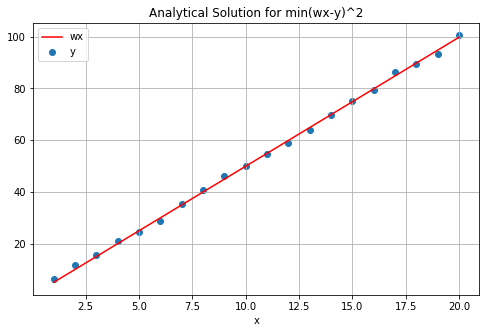

In [3]:
# lls - analytical solution
# we want to find w that minimizes (wx-y)^2
# by the above derivation
w = np.sum(y * x) / np.sum(np.square(x))
print("best w:", w)
# let's plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, label="y")
ax.plot(x, w * x, label="wx", color='r')
ax.legend()
ax.grid()
ax.set_xlabel("x")
ax.set_title("Analytical Solution for min(wx-y)^2")

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   LLS - Gradient Descent Solution
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow \frac{1}{N}\sum_{i=1}^N 2wx_i^2 -2x_iy_i$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

iter: 0  w =  0
iter: 1  w =  7.155872560680193
iter: 2  w =  4.043067996784308
iter: 3  w =  5.397137982079019
iter: 4  w =  4.80811753847582
iter: 5  w =  5.064341431443212
iter: 6  w =  4.952884038002396
iter: 7  w =  5.001368004149151
iter: 8  w =  4.980277478875313
iter: 9  w =  4.989451857369432
iter: 10  w =  4.98546100272449
iter: 11  w =  4.98719702449504
iter: 12  w =  4.986441855024851
iter: 13  w =  4.986770353744383
iter: 14  w =  4.986627456801386
iter: 15  w =  4.9866896169715895
iter: 16  w =  4.986662577297552
iter: 17  w =  4.986674339555758
iter: 18  w =  4.986669222973439
iter: 19  w =  4.986671448686747
best w: 4.986670480501458


Text(0.5,1,'Gradient Descent Solution for min(wx-y)^2')

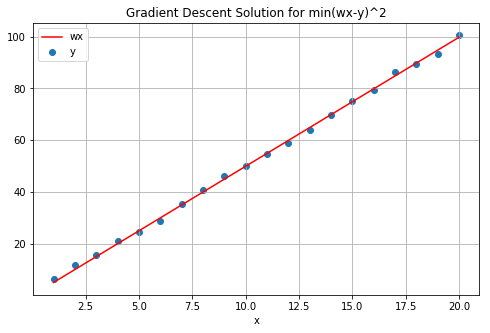

In [4]:
# lls - gradient descent solution
N = 20 # num samples
num_iterations = 20
alpha_k = 0.005
# we want to find w that minimizes (wx-y)^2
# initialize w
w = 0
for i in range(num_iterations):
    print("iter:", i, " w = ", w)
    gradient = np.sum(2 * w * np.square(x) - 2 * x * y) / N
    w = w - alpha_k * gradient
print("best w:", w)
# let's plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, label="y")
ax.plot(x, w * x, label="wx", color='r')
ax.legend()
ax.grid()
ax.set_xlabel("x")
ax.set_title("Gradient Descent Solution for min(wx-y)^2")

* **Least Squares Visualization**:
<img src="./assets/tut_06_lls_anim.gif">

### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:50px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
* The main problem with (Batch) GD is that it uses the **whole** training set to compute the gradients. But what if that training set is huge? Computing the gradient can take a very long time.
* *Stochastic* Gradient Descent on the other hand, samples just one instance randomly at every step and computes the gradients based on that single instance. This makes the algorithm much faster but due to its randomness, it is much less stable. Instead of steady decreasing untill reaching the minimum, the cost function will bounce up and down, **decreasing only on average**. With time, it will get *very close* to the minimum, but once it is there it will continue to bounce around!
* The final parameters are good but **not optimal**.
* When the cost function is very irregular, this bouncing can actually help the algorithm escape local minima, so SGD has better chance to fund the *global* minimum.
* How to find optimal parameters using SGD?
    * **Reduce the learning rate gradually**: this is called *learning schedule*
        * But don't reduce too quickly or you will get stuck at a local minimum or even frozen!
* *Mini-Batch* Gradient Descent - same idea as SGD, but instead of one instance each step, $m$ samples.
    * Get a little bit closer to the minimum than SGD but a little harder to escape local minima.
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\{x_1,...,x_m,\}$ with corresponding targets $\{y_1,...,y_m\}$
        * Compute gradient: $g \leftarrow \frac{1}{m} \sum_{i=1}^m f'(x_i,w)$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**
    
 <img src="https://cdn-images-1.medium.com/max/1000/1*PV-fcUsNlD9EgTIc61h-Ig.png" style="height:300px">
 (image from <a href="https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3">Imad Dabbura @ towardsdatascience.com</a> )

total batches: 4
iter: 0 batch: 0  w =  0
iter: 1 batch: 0  w =  3.7161003711532334
iter: 2 batch: 0  w =  4.661815365265101
iter: 3 batch: 0  w =  4.902491547488471
iter: 4 batch: 0  w =  4.963741527715352
iter: 5 batch: 0  w =  4.979329111177647
iter: 6 batch: 0  w =  4.983296014632865
iter: 7 batch: 0  w =  4.984305556815018
iter: 8 batch: 0  w =  4.984562476457518
iter: 9 batch: 0  w =  4.984627860256104
iter: 10 batch: 0  w =  4.98464449986013
iter: 11 batch: 0  w =  4.984648734493603
iter: 12 batch: 0  w =  4.98464981217073
iter: 13 batch: 0  w =  4.984650086430119
iter: 14 batch: 0  w =  4.984650156226731
iter: 15 batch: 0  w =  4.984650173989358
iter: 16 batch: 0  w =  4.984650178509791
iter: 17 batch: 0  w =  4.984650179660201
iter: 18 batch: 0  w =  4.98465017995297
iter: 19 batch: 0  w =  4.984650180027478
best w: 4.984650180046439


Text(0.5,1,'Mini-Batch Gradient Descent Solution for min(wx-y)^2')

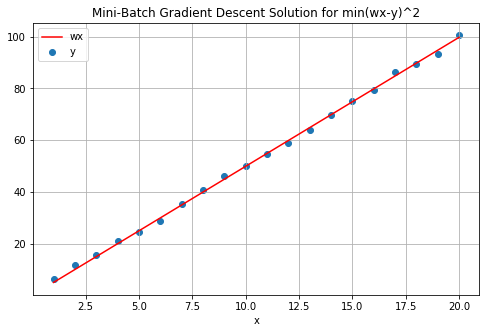

In [5]:
def batch_generator(x, y, batch_size, shuffle=True):
    """
    This function generates batches for a given dataset x.
    """
    N = len(x)
    num_batches = N // batch_size
    batch_x = []
    batch_y = []
    if shuffle:
        # shuffle
        rand_gen = np.random.RandomState(0)
        shuffled_indices = rand_gen.permutation(np.arange(len(x)))
        x = x[shuffled_indices]
        y = y[shuffled_indices]
    for i in range(N):
        batch_x.append(x[i])
        batch_y.append(y[i])
        if len(batch_x) == batch_size:
            yield np.array(batch_x), np.array(batch_y)
            batch_x = []
            batch_y = []
    if batch_x:
        yield np.array(batch_x), np.array(batch_y)
    

# mini-batch gradient descent
batch_size = 5
num_batches = N // batch_size
print("total batches:", num_batches)
num_iterations = 20
alpha_k = 0.001
batch_gen = batch_generator(x, y, batch_size, shuffle=True)
# we want to find w that minimizes (wx-y)^2
# initialize w
w = 0
for i in range(num_iterations):
    for batch_i, batch in enumerate(batch_gen):
        batch_x, batch_y = batch
        if batch_i % 5 == 0:
            print("iter:", i, "batch:", batch_i, " w = ", w)
        gradient = np.sum(2 * w * np.square(batch_x) - 2 * batch_x * batch_y) / len(batch_x)
        w = w - alpha_k * gradient
    batch_gen = batch_generator(x, y, batch_size, shuffle=True)
print("best w:", w)
# let's plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, label="y")
ax.plot(x, w * x, label="wx", color='r')
ax.legend()
ax.grid()
ax.set_xlabel("x")
ax.set_title("Mini-Batch Gradient Descent Solution for min(wx-y)^2")

* Note: All of the Gradient Descent algorithms require **scaling** if the feaures are not within the same range!

#### GD Comparison Summary
| <center>Method</center> | <center>Accuracy</center> | <center>Update Speed</center> | <center>Memory Usage</center>  | <center>Online Learning</center>  |
| --- | --- | --- | --- |
| **Batch** Gradient Descent | <center> Good </center>| <center>Slow </center>| <center> High </center>| <center> No </center>|
| **Stochastic** Gradient Descent | <center> Good (with softening) </center>| <center>Fast </center>| <center> Low </center>| <center> Yes </center>|
| **Mini-Batch** Gradient Descent | <center> Good </center>| <center>Medium </center>| <center> Medium </center>| <center> Yes (depends on the MB size) </center>|

* *"Online"* - samples arrive while the algorithm runs (that is, when the algorithm starts running, not all samples exist)

#### Challenges
* Choosing a **learning rate**
    * Defining **learning schedule**
* Working with features of different scales (e.g. heights (cm), weights (kg) and age (scalar))
* Avoiding **local minima** (or *suboptimal* minima)

## <img src="https://img.icons8.com/dusk/64/000000/math.png" style="height:50px;display:inline"> Mathematical Background

### <img src="https://img.icons8.com/dusk/64/000000/point-objects.png" style="height:50px;display:inline"> Multivariate Calculus
* **The Derivative** - the derivative of $f: \mathbb{R} \rightarrow \mathbb{R}$ is a *function* $f': \mathbb{R} \rightarrow \mathbb{R}$ given by:
$$ f'(x) = \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$
    * Illustration: <img src="./assets/tut_06_deriv.jpg" style="height:200px">
    * Rewrite the above: $$ \lim_{h \to 0} \frac{f(x+h) - f(x) -f'(x) \cdot h}{h}=0$$
        * <img src="./assets/tut_06_deriv_2.jpg" style="height:200px">
        
* **The Gradient** - the gradient of  $f: \mathbb{R}^N \rightarrow \mathbb{R}$ is a *function* $\nabla f: \mathbb{R}^N \rightarrow \mathbb{R}^N$ given by: $$ \lim_{h \to 0} \frac{||f(\overline{x}+\overline{h}) - f(\overline{x}) -\nabla f(\overline{x}) \cdot \overline{h}||}{||\overline{h}||} = 0$$
    * <br><img src="./assets/tut_06_gradient.gif" style="height:200px">
    * The gradient can be expressed in terms of the function's **partial derivatives**: $$\nabla f(x) = \begin{bmatrix}
           \frac{\partial f}{\partial x_1} \\
           \frac{\partial f}{\partial x_2} \\
           \vdots \\
           \frac{\partial f}{\partial x_n}
         \end{bmatrix} $$
    * Illustration: <img src="./assets/tut_06_gradient_2.jpg" style="height:200px">
    
* **The Hessian Matrix**
    * Definition: $H(f)(x)_{i,j} = \frac{\partial^2}{\partial x_i \partial x_j} f(x)$
    * $$ \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}  \\ \frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}  \\ \vdots  & \vdots  & \ddots & \vdots  \\ \frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}  \end{bmatrix} $$

## <img src="https://img.icons8.com/dusk/64/000000/scissors.png" style="height:50px;display:inline"> Matrix Calculus -  Vector & Matrix Derivatives
* We will use most of the derivations "as is" without derivation.
* A good reference: **<a href="http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf">The Matrix Cookbook</a>**
* <img src="https://img.icons8.com/plasticine/100/000000/error.png" style="height:20px;display:inline"> **REMEMBER** - ALWAYS write the dimensions of each component and identify whether the expression is a **matrix, vector or scalar**!

### <img src="https://img.icons8.com/bubbles/100/000000/multiply.png" style="height:50px;display:inline"> Derivative of Vector Multiplication
* Let $x, a \in \mathbb{R}^N \rightarrow x, a$ are vectors
* $\frac{\partial x^Ta}{\partial x} = \frac{\partial a^Tx}{\partial x} = a$
    * $x^Ta = a^Tx$ are **scalars**
    * $a$ is a **vector**
    * Derivation: $$ f = x^Ta = [x_1, x_2, ..., x_n] \begin{bmatrix}
           a_{1} \\
           a_{2} \\
           \vdots \\
           a_{n}
         \end{bmatrix}  = a_1 x_1 + a_2 x_2 + ... + a_n x_n = \sum_{i=1}^n a_i x_i$$ $$\frac{\partial x^Ta}{\partial x} = \begin{bmatrix}
           \frac{\partial f}{\partial x_1} \\
           \frac{\partial f}{\partial x_2} \\
           \vdots \\
           \frac{\partial f}{\partial x_n}
         \end{bmatrix} = \begin{bmatrix}
           a_{1} \\
           a_{2} \\
           \vdots \\
           a_{n}
         \end{bmatrix} = a $$

#### <img src="https://img.icons8.com/cotton/64/000000/bunch-of-keys-1.png" style="height:30px;display:inline"> Common Derivations
* $\nabla_x Ax = A^{T}$
* $\nabla_x x^{T} A x = (A + A^{T}) x$ 
    * If $W$ is **symetric**:
        * $\frac{\partial}{\partial s} (x-As)^T W (x-As) = -2A^TW(x-As)$
        * $\frac{\partial}{\partial x} (x-As)^T W (x-As) = 2W(x-As)$
* $\frac{\partial}{\partial A} \ln |A| = A^{-T}$
* $\frac{\partial}{\partial A} Tr[AB] = B^{T}$

### <img src="https://img.icons8.com/dusk/64/000000/link.png" style="height:50px;display:inline"> The Chain Rule
* Let $$ f(x) = h(g(x))$$ $$x \in \mathbb{R}^n $$ $$ f, g : \mathbb{R}^n \rightarrow \mathbb{R}$$ $$ h: \mathbb{R} \rightarrow \mathbb{R}$$
* $ \nabla f = h' \cdot \nabla g$
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise 1 - The Chain Rule
Find the gradient of $f(x) = \sqrt{x^TQx}$ ($Q$ is positive definite)
#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 1
* $g(x) = x^TQx \rightarrow \nabla g = (Q + Q^T) x = 2Qx$
* $h(z) = \sqrt{z} \rightarrow h'(z) = \frac{1}{2\sqrt{z}}$
* $\nabla f =\frac{1}{2\sqrt{x^TQx}}2Qx = \frac{Qx}{\sqrt{x^TQx}} $

## <img src="https://img.icons8.com/nolan/64/000000/3d-scale.png" style="height:50px;display:inline">  Multi-Dimensional Optimization

### <img src="https://img.icons8.com/dusk/64/000000/copyleft.png" style="height:50px;display:inline"> Optimality Conditions
* If $f$ has *local* optimum at $x_0$ then $\nabla f(x_0) = 0$
* If the **Hessian** is:
    * **Positive Definite** (all eigenvalues *positive*) at $x_0 \rightarrow$ *local minimum*
    * **Negative Definite** (all eigenvalues *negative*) at $x_0 \rightarrow$ *local maximum*
    * Both **positive and negative** eigenvalues at $x_0 \rightarrow$ *saddle* point
    * <img src="./assets/tut_06_saddle.jpg" style="height:100px">
    
### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - (Multivariate) Linear Least Squares
* **Problem Formulation**
    * $y \in \mathbb{R}^N$ - vector of values
    * $X \in \mathbb{R}^{N \times L}$ - data matrix with $N$ examples and *$L$ features*
    * $w \in \mathbb{R}^L$ - the *parameters* to be learnt, a **weight for each feature**
* **Goal**: find $w$ that best fits the measurement y, that is, find a *weighted linear combination* of the feature vector to best fit the measurment $y$
* Mathematiacally, the problem is:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N||x_i w-y_i||^2 $$
* In vector form:
$$\min_w f(w;x,y) = \min_w ||Xw - Y||^2 $$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   (Multivariate) LLS - Analytical Solution
* Mathematiacally:
$$\min_w f(w;x,y) = \min_w ||Xw - Y||^2 = \min_w (Xw-Y)^T(Xw-Y)= \min_w (w^TX^TXw -2w^TX^TY + Y^TY)$$
* The derivative: 
$$\nabla_w f(w;x,y) = (X^TX + X^TX)w -2X^TY = 0 \rightarrow w=(X^TX)^{-1}X^TY $$ $$X^TX \in \mathbb{R}^{L \times L} $$

In [6]:
# let's load the cancer dataset
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
# reminder, the data looks like this
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
327,895299,B,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,NaN
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,...,19.23,65.59,310.1,0.09836,0.16780,0.139700,0.05087,0.3282,0.08490,NaN
81,8611161,B,13.340,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,...,23.19,96.66,614.9,0.15360,0.47910,0.485800,0.17080,0.3527,0.10160,NaN
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,...,26.40,166.10,2027.0,0.14100,0.21130,0.410700,0.22160,0.2060,0.07115,NaN
92,861853,B,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,...,22.35,104.50,830.6,0.10060,0.12380,0.135000,0.10010,0.2027,0.06206,NaN
345,898677,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,...,19.48,70.89,357.1,0.13600,0.16360,0.071620,0.04074,0.2434,0.08488,NaN
179,873586,B,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,...,16.15,86.70,570.7,0.11620,0.05445,0.027580,0.03990,0.1783,0.07319,NaN
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,...,35.64,113.20,848.7,0.14710,0.28840,0.379600,0.13290,0.3470,0.07900,NaN
245,884437,B,10.480,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.030700,...,29.46,73.68,402.8,0.15150,0.10260,0.118100,0.06736,0.2883,0.07748,NaN
159,871149,B,10.900,12.96,68.69,366.8,0.07515,0.03718,0.003090,0.006588,...,18.20,78.07,470.0,0.11710,0.08294,0.018540,0.03953,0.2738,0.07685,NaN


<IPython.core.display.Javascript object>


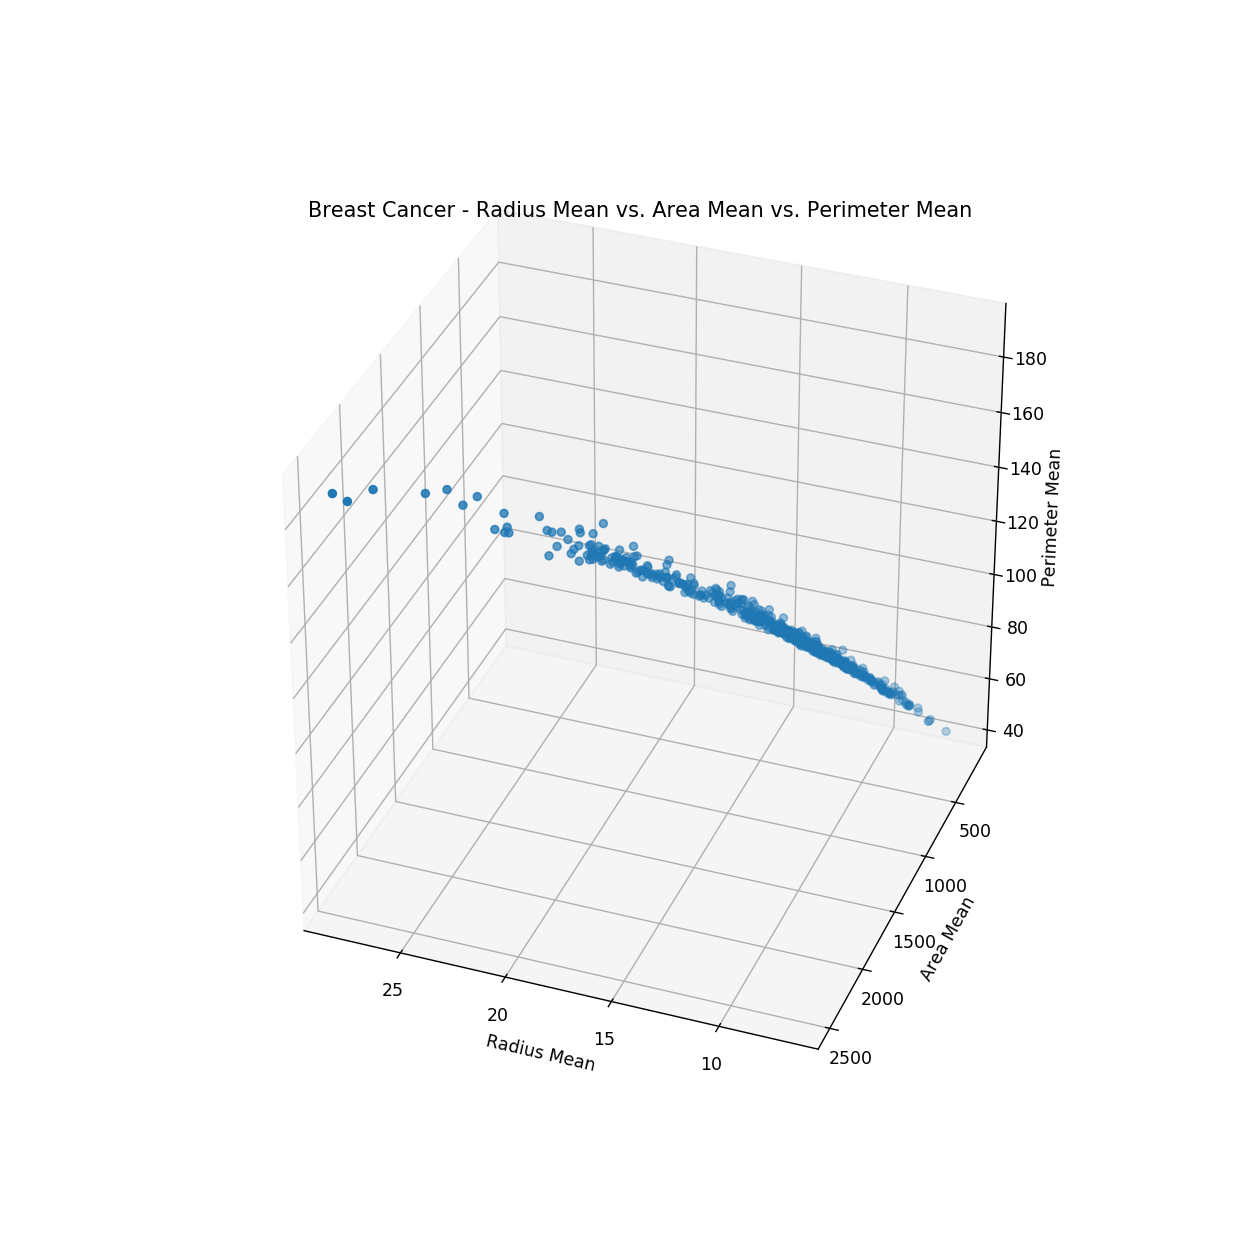

Text(0.5,0.92,'Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean')

In [7]:
# let's plot X = [radius, area], y = perimeter
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xs = dataset[['radius_mean']].values
ys = dataset[['area_mean']].values
zs = dataset[['perimeter_mean']].values
ax.scatter(xs, ys, zs)
# ax.axis('equal')
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Area Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title("Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean")


<IPython.core.display.Javascript object>


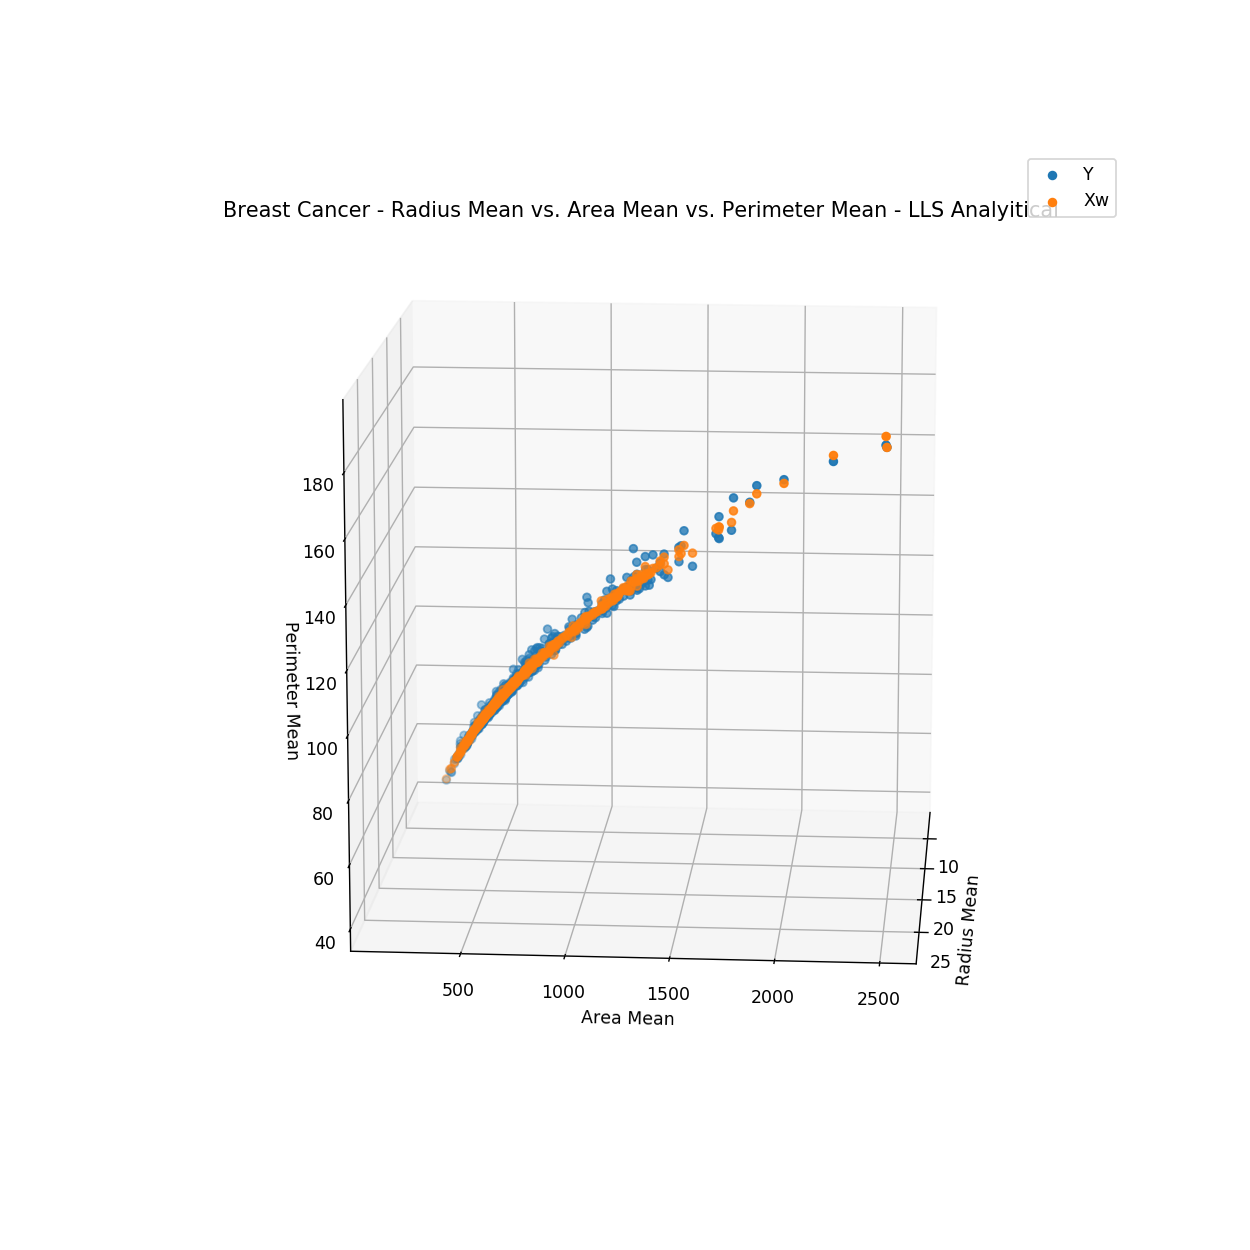

w:
[[6.19721311]
 [0.00676913]]


In [8]:
# multivariate lls - analytical solution
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
w = np.linalg.inv(X.T @ X) @ X.T @ Y
lls_sol = X @ w
# plot
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
xs = dataset[['radius_mean']].values
ys = dataset[['area_mean']].values
zs = dataset[['perimeter_mean']].values
ax.scatter(xs, ys, zs, label='Y')
ax.scatter(xs, ys, lls_sol, label='Xw')
ax.legend()
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Area Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title("Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Analyitical")
print("w:")
print(w)

## What If L is Very Large???
If $L = 1000$, we would need to invert a $1000 \times 1000$ matrix, which would take about $10^9$ operations!

### <img src="https://img.icons8.com/dusk/64/000000/treasure-map.png" style="height:50px;display:inline">(Batch) Gradient Descent
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter vector $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow \nabla f(x,w)$ 
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**
* For **Linear Least Squares**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter vector $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow 2X^TXw - 2X^Ty$ 
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

iter: 0  w = 
[[0.]
 [0.]]
iter: 1  w = 
[[0.11355593]
 [0.11226447]]
iter: 2  w = 
[[0.20157502]
 [0.19899397]]
iter: 3  w = 
[[0.2698325 ]
 [0.26596371]]
iter: 4  w = 
[[0.32279748]
 [0.31764279]]
iter: 5  w = 
[[0.36392832]
 [0.35748959]]
iter: 6  w = 
[[0.39590123]
 [0.38818031]]
iter: 7  w = 
[[0.42078718]
 [0.41178591]]
iter: 8  w = 
[[0.44018875]
 [0.42990898]]
iter: 9  w = 
[[0.4553461 ]
 [0.44378965]]
iter: 10  w = 
[[0.46721888]
 [0.45438761]]
iter: 11  w = 
[[0.47654975]
 [0.46244548]]
iter: 12  w = 
[[0.48391337]
 [0.46853793]]
iter: 13  w = 
[[0.48975445]
 [0.47310968]]
iter: 14  w = 
[[0.49441713]
 [0.47650485]]
iter: 15  w = 
[[0.49816771]
 [0.47898975]]
iter: 16  w = 
[[0.50121227]
 [0.48077045]]
iter: 17  w = 
[[0.50371028]
 [0.48200641]]
iter: 18  w = 
[[0.50578514]
 [0.48282104]]
iter: 19  w = 
[[0.50753235]
 [0.48330983]]


<IPython.core.display.Javascript object>


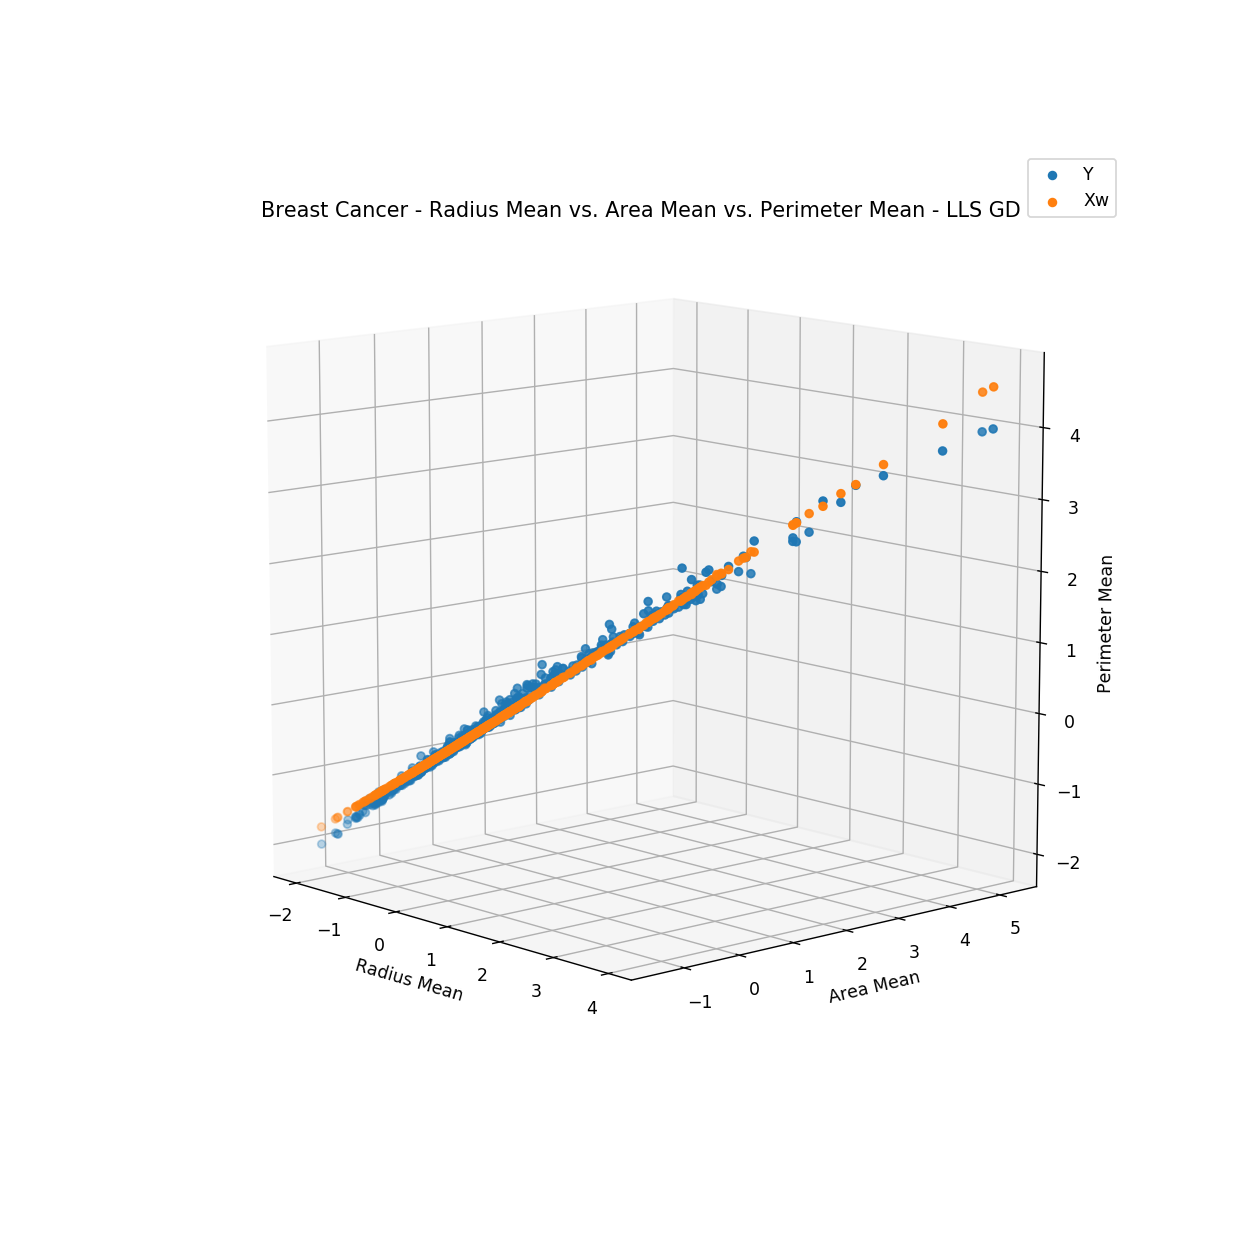

w:
[[0.50902581]
 [0.48354668]]


In [9]:
# multivariate lls - gradient descent solution
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
# Scaling
X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
Y = (Y - Y.mean(axis=0, keepdims=True)) / Y.std(axis=0, keepdims=True)
num_iterations = 20
alpha_k = 0.0001
L = X.shape[1]
# initialize w
w = np.zeros((L, 1))
for i in range(num_iterations):
    print("iter:", i, " w = ")
    print(w)
    gradient = 2 * X.T @ X @ w - 2 * X.T @ Y
    w = w - alpha_k * gradient
lls_sol = X @ w
# plot
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, label='Y')
ax.scatter(X[:,0], X[:,1], lls_sol, label='Xw')
ax.legend()
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Area Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title("Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS GD")
print("w:")
print(w)

### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:50px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\tilde{X} = [x_1,...,x_m] $ with corresponding targets $\tilde{Y} = [y_1,...,y_m]$
        * Compute gradient: $g \leftarrow 2\tilde{X}^T\tilde{X} - 2\tilde{X}^T \tilde{Y}$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

total batches: 56
iter: 0 batch: 0  w = 
[[0.]
 [0.]]
iter: 0 batch: 50  w = 
[[0.4391737 ]
 [0.41735388]]
iter: 1 batch: 0  w = 
[[0.45621431]
 [0.43296123]]
iter: 1 batch: 50  w = 
[[0.50458588]
 [0.46953377]]
iter: 2 batch: 0  w = 
[[0.50659246]
 [0.46976394]]
iter: 2 batch: 50  w = 
[[0.51664408]
 [0.46913792]]
iter: 3 batch: 0  w = 
[[0.51715596]
 [0.46786206]]
iter: 3 batch: 50  w = 
[[0.52339741]
 [0.46367398]]
iter: 4 batch: 0  w = 
[[0.52374047]
 [0.4622501 ]]
iter: 4 batch: 50  w = 
[[0.5295512 ]
 [0.45779193]]
iter: 5 batch: 0  w = 
[[0.52985556]
 [0.456353  ]]
iter: 5 batch: 50  w = 
[[0.53556725]
 [0.45194588]]
iter: 6 batch: 0  w = 
[[0.53584598]
 [0.45050492]]
iter: 6 batch: 50  w = 
[[0.54149192]
 [0.44617918]]
iter: 7 batch: 0  w = 
[[0.54174661]
 [0.44473749]]
iter: 7 batch: 50  w = 
[[0.54733087]
 [0.44049501]]
iter: 8 batch: 0  w = 
[[0.54756198]
 [0.43905271]]
iter: 8 batch: 50  w = 
[[0.55308576]
 [0.43489257]]
iter: 9 batch: 0  w = 
[[0.55329364]
 [0.43344969]]
i

<IPython.core.display.Javascript object>


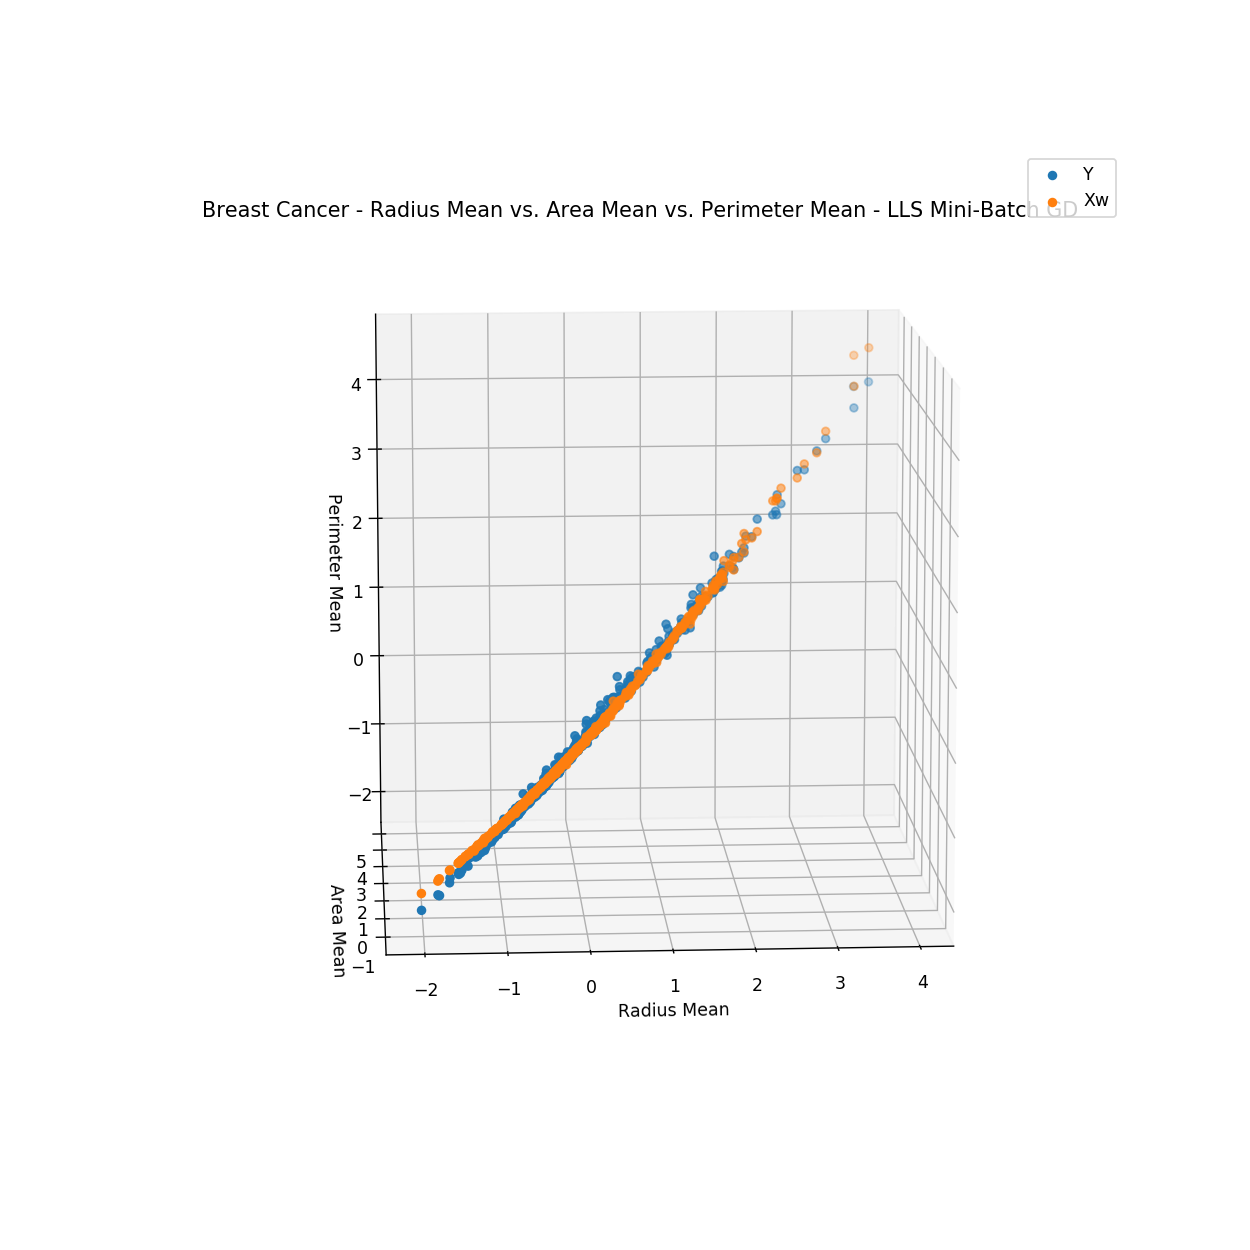

w:
[[0.55894282]
 [0.42792729]]


In [10]:
def batch_generator(x, y, batch_size, shuffle=True):
    """
    This function generates batches for a given dataset x.
    """
    N, L = x.shape
    num_batches = N // batch_size
    batch_x = []
    batch_y = []
    if shuffle:
        # shuffle
        rand_gen = np.random.RandomState(0)
        shuffled_indices = rand_gen.permutation(np.arange(N))
        x = x[shuffled_indices, :]
        y = y[shuffled_indices, :]
    for i in range(N):
        batch_x.append(x[i, :])
        batch_y.append(y[i, :])
        if len(batch_x) == batch_size:
            yield np.array(batch_x).reshape(batch_size, L), np.array(batch_y).reshape(batch_size, 1)
            batch_x = []
            batch_y = []
    if batch_x:
        yield np.array(batch_x).reshape(-1, L), np.array(batch_y).reshape(-1, 1)
    

# multivaraite mini-batch gradient descent
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
# Scaling
X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
Y = (Y - Y.mean(axis=0, keepdims=True)) / Y.std(axis=0, keepdims=True)
N = X.shape[0]
batch_size = 10
num_batches = N // batch_size
print("total batches:", num_batches)
num_iterations = 10
alpha_k = 0.001
batch_gen = batch_generator(X, Y, batch_size, shuffle=True)
# initialize w
w = np.zeros((L, 1))
for i in range(num_iterations):
    for batch_i, batch in enumerate(batch_gen):
        batch_x, batch_y = batch
        if batch_i % 50 == 0:
            print("iter:", i, "batch:", batch_i, " w = ")
            print(w)
        gradient = 2 * batch_x.T @ batch_x @ w - 2 * batch_x.T @ batch_y
        w = w - alpha_k * gradient
    batch_gen = batch_generator(X, Y, batch_size, shuffle=True)

lls_sol = X @ w
# plot
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, label='Y')
ax.scatter(X[:,0], X[:,1], lls_sol, label='Xw')
ax.legend()
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Area Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title("Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Mini-Batch GD")
print("w:")
print(w)

## <img src="https://img.icons8.com/office/80/000000/conflict.png" style="height:50px;display:inline"> Constrained Optimization
### <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Largrange Multipliers
* A method for optimization with **equality constraints**
* The general case: $$ \min f(x,y) $$ $$ \textit{s.t. (subject to)}: g(x,y)=0 $$
* The *Lagrange* function (*Lagrangian*) is defined by: $$ \mathcal{L}(x,y,\lambda) = f(x,y) -\lambda \cdot g(x,y) $$
* Geometric Intuition: let's look at the following figure - <br>
    * <img src="./assets/tut_06_lagrange.jpg" style="height:400px"> <br>
    * To maximize $f(x,y)$ subject to $g(x,y)=0$ is to find the largest value $c \in \{7,8,9,10,11\}$ such that the level curve (contour) $f(x,y) = c$ intersects with $g(x,y)=0$
    * It happens when the curves just touch each other
        * When they have a common tangent line
    * Otherwise, the value of $c$ should be increased
    * Since the gradient of a function is **perperndicular** to the contour lines:
        * The *contour lines* of $f$ and $g$ are **parallel** iff the *gradients* of $f$ and $g$ are **parallel**
        * Thus, we want points $(x,y)$ where $g(x,y) = 0$ and $$\nabla_{x,y}f(x,y)=\lambda \nabla_{x,y} g(x,y) $$
            * $\lambda$ - *"The Lagrange Multiplier"* is required to adjust the **magnitudes** of the (parallel) gradient vectors.
            
###  <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"><img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Multiple Constraints
* Extenstion of the above for problems with **multiple constraints** using a similar argument
* The general case: minimze $f(x)$ s.t. $g_i(x)=0$, $i = 1,2,..., m$ 
* The **Lagrangian** is a weighted sum of objective and constraint functions: $$ \mathcal{L}(x, \lambda_1, ..., \lambda_m) = f(x) - \sum_{i=1}^m \lambda_i g_i(x)$$
    * $\lambda_i$ is the Lagrange multipler associated with $g_i(x) = 0$
* The **solution** is obtained by solving the (unconstrained) optimization problem: $$\nabla_{x, \lambda_1, ..., \lambda_m}\mathcal{L}(x, \lambda_1, ..., \lambda_m) = 0 \iff \begin{cases}
    \nabla_x \big[f(x) - \sum_{i=1}^m \lambda_ig_i(x) = 0 \big]\\
    g_1(x) = ... = g_m(x) = 0
  \end{cases}$$
  * Amounts to solving $d + m$ equations in $d+m$ unkowns
      * $d = |x|$ is the dimension of $x$
      
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise 2 - Max Entropy Distribution
Maximize $H(P) = -\sum_{i=1}^d p_i \log p_i$ subject to $\sum_{i=1}^d p_i = 1$
#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 2
* The Lagrangian is: $$L(P,\lambda) = -\sum_{i=1}^d p_i \log p_i -\lambda \big(\sum_{i=1}^dp_i -1 \big) $$
* Find stationary point for $L$:
    * $\forall i$, $\frac{\partial L(P,\lambda)}{\partial p_i} = -\log p_i -1 -\lambda =0 \rightarrow p_i = e^{-\lambda - 1}$
    * $\frac{\partial L(P,\lambda)}{\partial \lambda} = -\sum_{i=1}^d p_i + 1 = 0 \rightarrow \sum_{i=1}^d e^{-\lambda - 1} = 1 \rightarrow e^{-\lambda - 1} = \frac{1}{d} = p_i$
    * The Max Entropy distribution is the **uniform distribution**

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/